# Time Series Analysis

1. Import libraries and data


2. Subsetting, wrangling and cleaning


3. Decomposition


4. Test time series for stationarity


4. Make time series stationary

** **


## 1. Import libraries and data

In [1]:
# Import libraries

import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings

In [2]:
# Disable deprecation warnings

warnings.filterwarnings("ignore")

In [3]:
# Adjust styling of plots

plt.style.use('fivethirtyeight')

In [4]:
# Configure API key 

quandl.ApiConfig.api_key = '6DxaZxpHc1e2UxJ8HpS5'

In [5]:
# Import data set: US historical real home price index (Yale Dept. of Economics)

data = quandl.get('YALE/RHPI')

In [6]:
data.head()

,Index
Date,
1890-12-31,100.000000
1891-12-31,88.011791
1892-12-31,95.421736
1893-12-31,92.297385
1894-12-31,123.980483


In [7]:
data.shape

(893, 1)

In [8]:
data.tail()

,Index
Date,
2021-10-31,210.745812
2021-11-30,211.922256
2021-12-31,211.973616
2022-01-31,212.529443
2022-02-28,213.358942


In [9]:
data.columns

Index(['Index'], dtype='object')

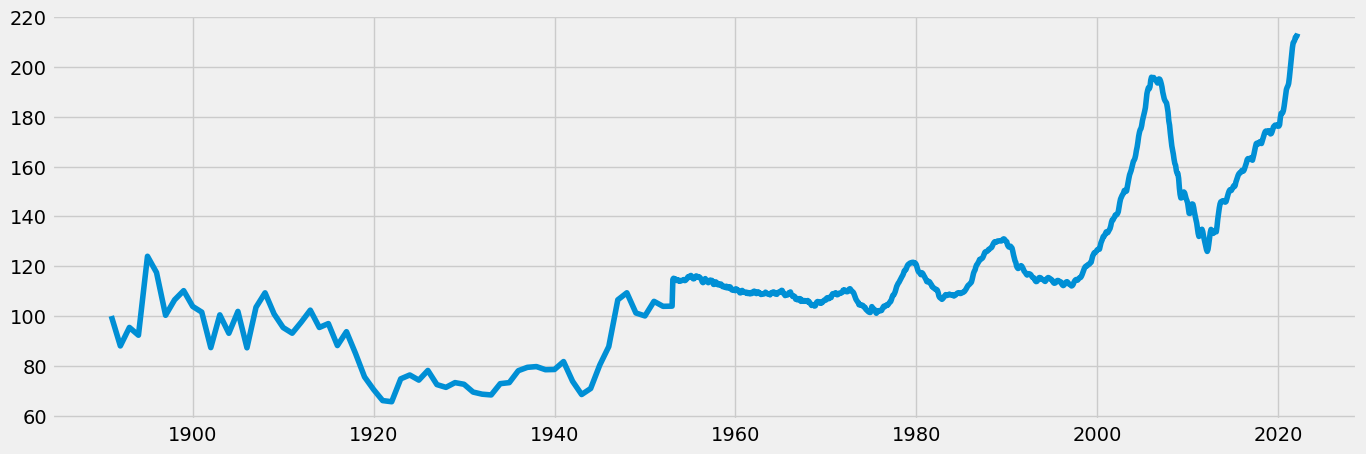

In [10]:
# Plot data with reduced DPI

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data)

In [11]:
# Check type

type(data)

pandas.core.frame.DataFrame

## 2. Subsetting, wrangling and cleaning

In [12]:
# Create subset and add index 

data_2 = data.reset_index()

In [13]:
data_2.head()

,Date,Index
0,1890-12-31,100.000000
1,1891-12-31,88.011791
2,1892-12-31,95.421736
3,1893-12-31,92.297385
4,1894-12-31,123.980483


In [14]:
# Create subset for records from 1990 to 2021

data_3 = data_2.loc[(data_2['Date'] >= '1990-01-01')]

I chose to begin my data selection from the year 1990, as it signifies the onset of significant political transformations that have had a profound impact on the economy. This period extends up until the present day, capturing a comprehensive range of developments over the years.

In [15]:
data_3.head()

,Date,Index
507,1990-01-31,128.529886
508,1990-02-28,128.027702
509,1990-03-31,127.668860
510,1990-04-30,127.884108
511,1990-05-31,128.014447


In [16]:
data_3.shape

(386, 2)

In [17]:
# Make Date index again, for that import datetime

from datetime import datetime

data_3['datetime'] = pd.to_datetime(data_3['Date'])
data_3 = data_3.set_index('datetime')
data_3.drop(['Date'], axis=1, inplace=True)

In [18]:
data_3.head()

,Index
datetime,
1990-01-31,128.529886
1990-02-28,128.027702
1990-03-31,127.668860
1990-04-30,127.884108
1990-05-31,128.014447


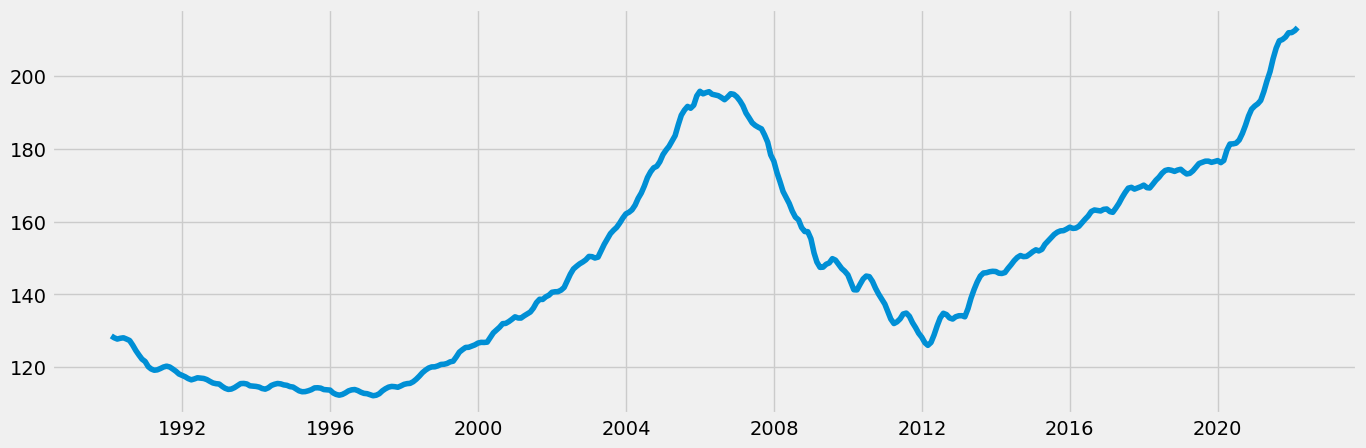

In [19]:
# Plot it

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_3)

The given time series displays a nonlinear nature, characterized by the presence of a discernible trend, recurring seasonal patterns, and possibly a cyclic behavior.

In [20]:
# Check missing values

data_3.isnull().sum() 

Index    0
dtype: int64

In [21]:
# Check for duplicates

dups = data_3.duplicated()
dups.sum()

0

## 3. Decomposition

In [22]:
# Decompose it with an multiplicative model

decomposition = sm.tsa.seasonal_decompose(data_3, model='multiplicative')

In [23]:
# Define fixed size for special charts, import rcParams

from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

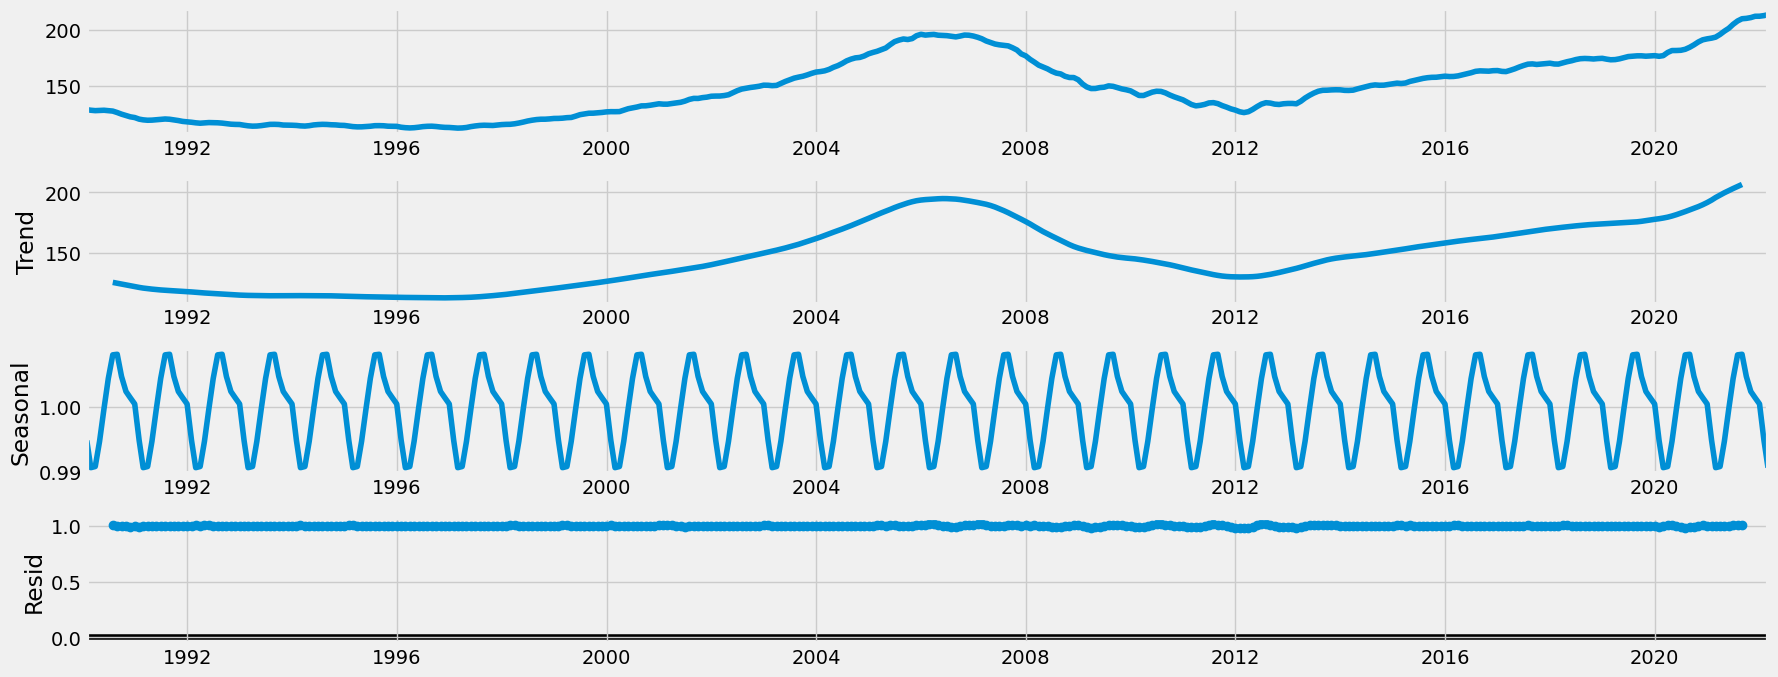

In [24]:
# Plot the decomposition

decomposition.plot()
plt.show()

The decomposition analysis reveals a clear and consistent upward trend throughout the observed period, reaching its highest point in 2006-2007.

Moreover, the decomposition demonstrates the presence of seasonality in the time series, with distinct recurring patterns. Additionally, the level of noise in the data is exceptionally low.

Based on these observations, it is evident that both the trend and seasonality components contribute to the non-stationarity of the series. To further validate this hypothesis, I will conduct appropriate statistical tests.

## 4. Test time series for stationarity

H0: The time series has a unit root, is non-stationary.

HA: The time series has no unit root, is stationary.

In [25]:
# Import adfuller, define function which prints correct output (number array)

from statsmodels.tsa.stattools import adfuller 

def dickey_fuller(timeseries): 
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

In [26]:
# Apply test using function on time series

dickey_fuller(data_3['Index'])

Dickey-Fuller Stationarity test:
Test Statistic                  -1.099593
p-value                          0.715234
Number of Lags Used             17.000000
Number of Observations Used    368.000000
Critical Value (1%)             -3.448245
Critical Value (5%)             -2.869426
Critical Value (10%)            -2.570971
dtype: float64


Based on the given information, the test statistic exceeds all critical values, leading to the conclusion that I cannot reject the null hypothesis.

This implies that the time series in question possesses a unit root, indicating non-stationarity. Additionally, the p-value associated with the unit root test is calculated as 0.72.

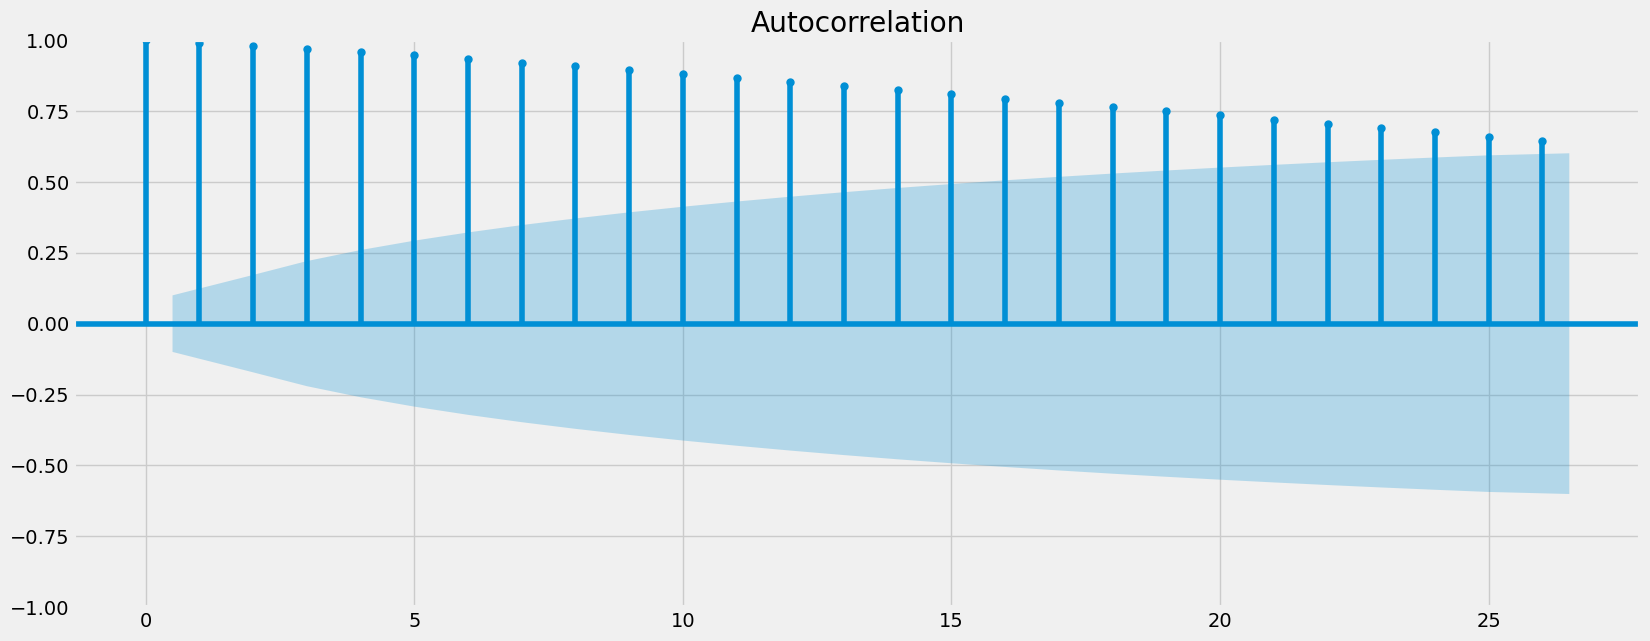

In [27]:
# Check for autocorrelations, import autocorrelation and partial correlation plots

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data_3)
plt.show()

The presence of strong correlations among multiple variables indicates a notable lack of stationarity within the dataset.

## 5. Make time series stationary

In [28]:
# Create subset applying the differencing method

data_diff = data_3 - data_3.shift(1)

In [29]:
# Remove the resulting missing values

data_diff.dropna(inplace = True) 

In [30]:
# Have a look

data_diff.head()

,Index
datetime,
1990-02-28,-0.502184
1990-03-31,-0.358841
1990-04-30,0.215248
1990-05-31,0.130339
1990-06-30,-0.347219


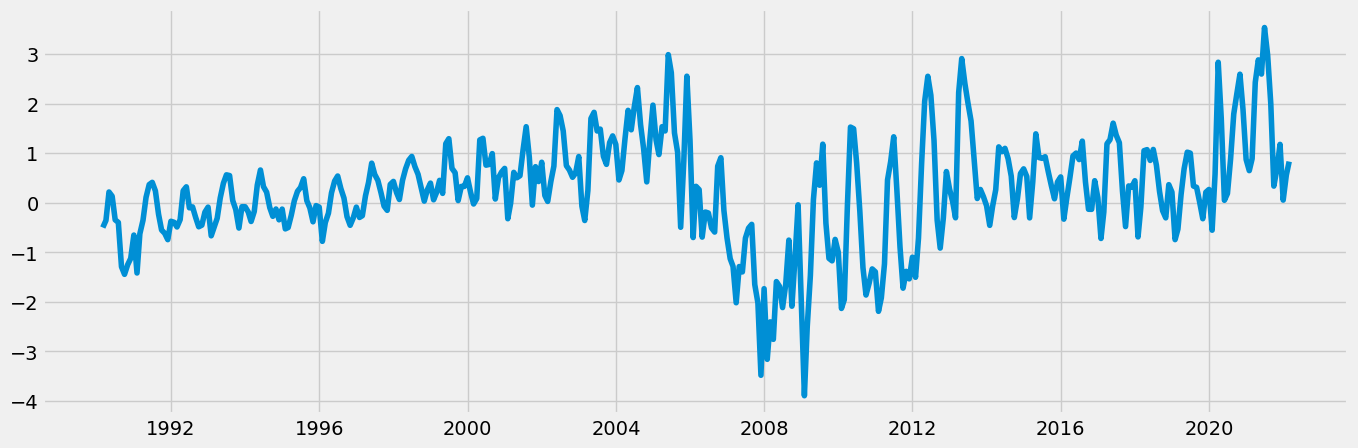

In [31]:
# Check how does the differencing changed the the graph

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [32]:
# Perform Dickey-Fuller on data_diff

dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -3.270046
p-value                          0.016272
Number of Lags Used             17.000000
Number of Observations Used    367.000000
Critical Value (1%)             -3.448294
Critical Value (5%)             -2.869448
Critical Value (10%)            -2.570983
dtype: float64


The test statistic exceeds both the critical values for significance levels of 5% and 1%, albeit only slightly, yielding a p-value of 0.02. While not reaching perfection, this p-value is more satisfactory.

Consequently, I am now able to reject the null hypothesis. Therefore, the data can be deemed stationary.

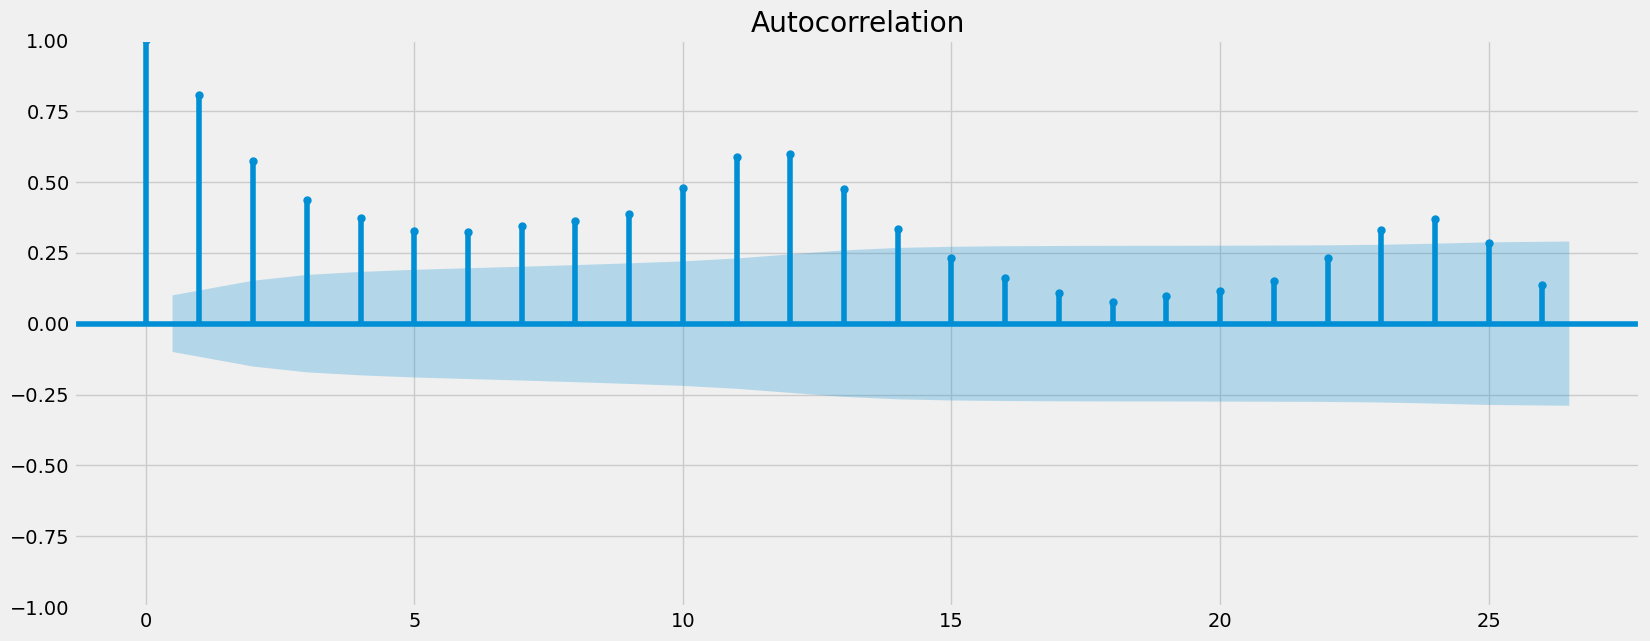

In [33]:
# Check autocorrelations after differencing

plot_acf(data_diff)
plt.show()

Although there are still some lags with high autocorrelation, their number has decreased. While it is tempting to consider another round of differencing to address this issue, it is important to exercise caution to avoid overdifferencing the data. Overdifferencing can lead to the loss of valuable information and introduce artificial patterns or noise into the dataset.

Instead of immediately resorting to differencing, it may be worth exploring alternative approaches to address the remaining autocorrelation. Here are a few suggestions:

1. Use a different model: Consider using a different modeling technique that can handle autocorrelation effectively, such as autoregressive integrated moving average (ARIMA) or its variations like SARIMA or ARIMAX. These models incorporate lagged variables and can capture the autocorrelation structure of the data.

2. Include lagged variables: Instead of differencing, you can introduce lagged variables into your model. By including appropriate lagged terms as predictors, you can account for the autocorrelation in the data. This approach is commonly used in time series analysis and can capture the temporal dependencies effectively.

3. Explore other transformations: Besides differencing, there are other transformations that can help stabilize the data and reduce autocorrelation. For instance, you can try logarithmic transformations, square root transformations, or Box-Cox transformations. These transformations can often mitigate the autocorrelation while preserving the essential characteristics of the data.

4. Consider seasonal patterns: If your data exhibits seasonal patterns, you may need to employ seasonal differencing or seasonal models such as SARIMA. These models specifically account for the seasonal component and can effectively address autocorrelation associated with periodic variations.

Remember to evaluate the effectiveness of each approach using appropriate statistical tests, model diagnostics, and validation techniques. It's essential to strike a balance between reducing autocorrelation and preserving the integrity of the underlying data structure.